In [1]:
# Josh Kenn Viray
# 3CSC
# Formative 2.1
# flake8: noqa

In [ ]:
# =============================================================================
# 1. Load Data
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

# Load the data 
df = pd.read_csv('./../Student_Performance.csv')
df.head()  


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


In [3]:
# =============================================================================
# 2. Select a unique randomization seed
# =============================================================================

seed = 39
np.random.seed(seed)

# let n be the target sample of observations
n = 30

# let tn be the target sample of observations
tn = 30

# let i be iterations
i = 1000

In [4]:
# =============================================================================
# 3. Sample Train Data
# =============================================================================

features = ['Hours Studied', 'Previous Scores', 
            'Extracurricular Activities', 
            'Sample Question Papers Practiced', 
            'Performance Index']
target = 'Performance Index'

# Randomly sample 30 observations for training using the seed.
train_df = df.sample(n, random_state=seed)

# Check that the training sample looks representative
print("Training Sample:")
train_df.head()

Training Sample:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9229,2,96,0,9,6,74
7476,6,95,1,8,4,84
2702,5,79,0,8,5,65
3941,1,91,1,5,0,63
3540,1,50,0,4,6,22


In [5]:
scaler = StandardScaler()

In [6]:
X_train = train_df[features].values
y_train = train_df[target].values
X_train_scaled = scaler.fit_transform(X_train)

X_train_aug = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]


In [7]:
# =============================================================================
# 4. Building the Weight Update (Gradient Descent) Function
# =============================================================================
def gradient_descent(X, y, weights, learning_rate=0.01, iterations=50):
    weight_history = []
    for i in range(iterations):
        # Compute predictions
        predictions = X.dot(weights)
        
        # Compute errors and Mean Squared Error (MSE) loss
        errors = predictions - y
        loss = np.mean(errors ** 2)
        
        # Compute gradients (partial derivatives)
        gradients = (1 / len(y)) * X.T.dot(errors)
        
        # Update weights using gradient descent rule
        weights = weights - learning_rate * gradients
        
        # Save current weights in history and print iteration details
        weight_history.append(weights.copy())
        print(f"Iteration {i+1}: Weights = {weights}, Loss = {loss:.4f}")
    return weights, weight_history

# Initialize weights (one for intercept plus one per feature)
initial_weights = np.zeros(X_train_aug.shape[1])


In [8]:
# =============================================================================
# 5. Displaying Weights per Iteration
# =============================================================================
# Run gradient descent
final_weights, weight_history = gradient_descent(X_train_aug, y_train, 
                                                 initial_weights,
                                                 learning_rate=0.01, 
                                                 iterations=i) # sameple is 30 given n = 30 as per instructions
                                                  # please check the last cell for all iterations n = 10,000

Iteration 1: Weights = [0.55       0.06436373 0.17343832 0.06640459 0.01581193 0.19440508], Loss = 3402.9333
Iteration 2: Weights = [1.0945     0.12758948 0.34327526 0.13086307 0.0310865  0.38486599], Loss = 3327.5608
Iteration 3: Weights = [1.633555   0.18969909 0.50958688 0.19342136 0.04583804 0.57146517], Loss = 3254.0136
Iteration 4: Weights = [2.16721945 0.25071395 0.67244765 0.25412436 0.06008052 0.7542833 ], Loss = 3182.2417
Iteration 5: Weights = [2.69554726 0.31065502 0.83193042 0.31301597 0.07382758 0.93339934], Loss = 3112.1966
Iteration 6: Weights = [3.21859178 0.36954285 0.98810651 0.37013914 0.08709254 1.1088906 ], Loss = 3043.8312
Iteration 7: Weights = [3.73640587 0.42739755 1.14104572 0.42553584 0.0998884  1.28083275], Loss = 2977.1001
Iteration 8: Weights = [4.24904181 0.48423885 1.29081636 0.47924711 0.11222784 1.44929985], Loss = 2911.9591
Iteration 9: Weights = [4.75655139 0.54008609 1.43748529 0.53131309 0.12412325 1.61436442], Loss = 2848.3655
Iteration 10: Weigh

In [9]:
print(final_weights)

[5.49976256e+01 4.04978095e+00 8.51570628e+00 3.04915306e-02
 2.82218909e-01 1.04427285e+01]


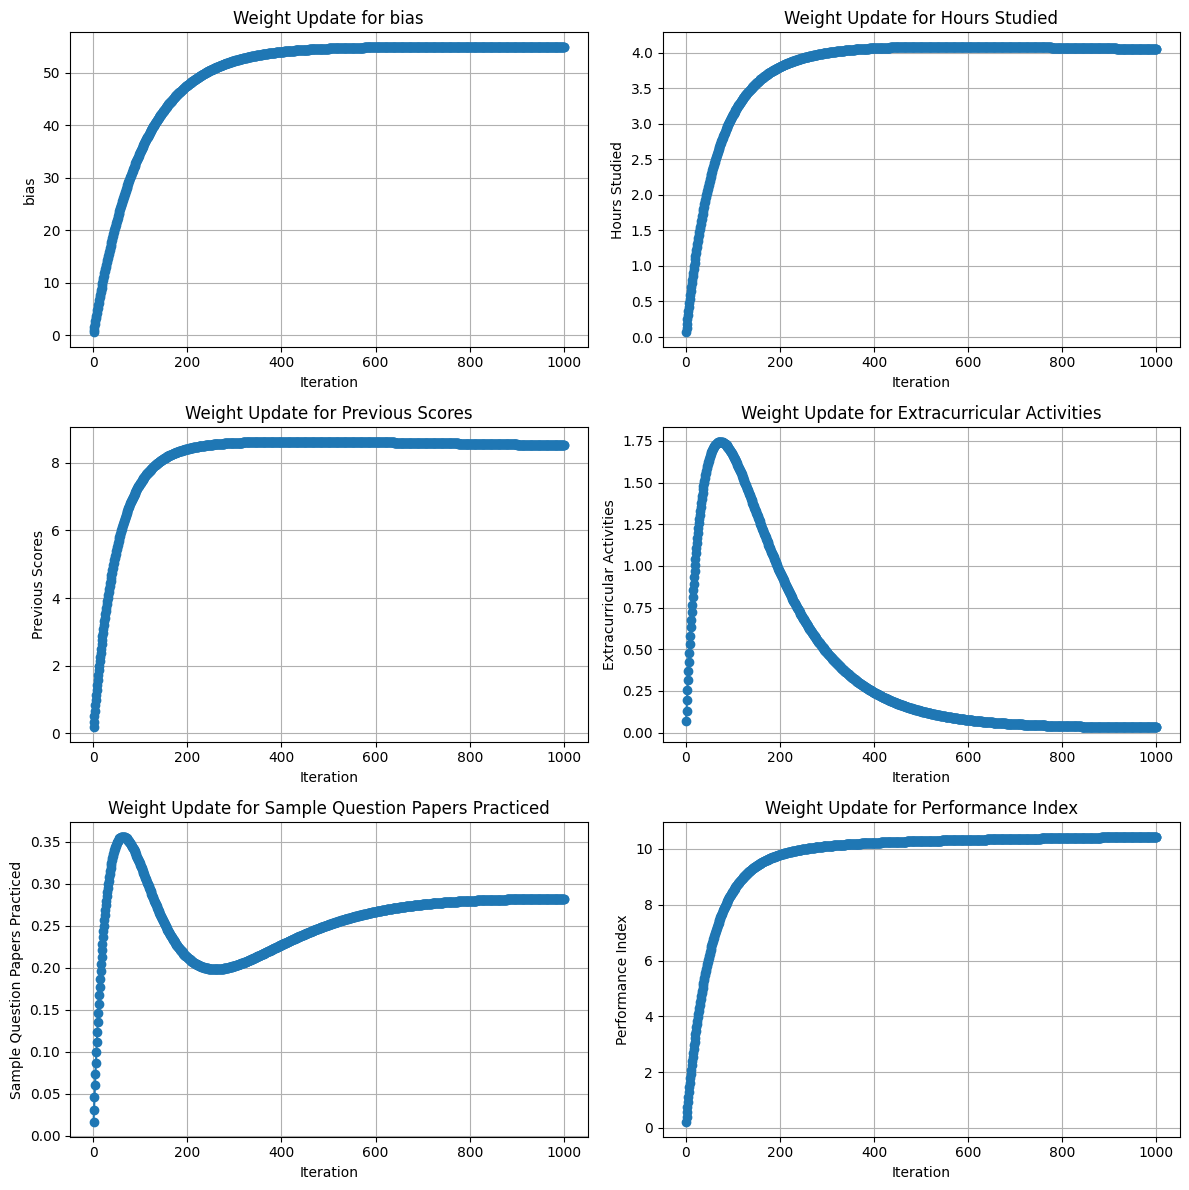

In [10]:
# =============================================================================
# 6. Plot the Value of Weights per Iteration
# =============================================================================

# Convert weight_history list to a NumPy array for plotting
weight_history = np.array(weight_history)  # shape: (iterations, number_of_weights)

weight_names = ['bias'] + features

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()  # Flatten the grid for easy indexing

# Plot the evolution of each weight over iterations
for j in range(weight_history.shape[1]):
    axs[j].plot(range(1, len(weight_history) + 1), weight_history[:, j],
                marker='o', linestyle='-')
    axs[j].set_xlabel('Iteration')
    axs[j].set_ylabel(weight_names[j])
    axs[j].set_title(f'Weight Update for {weight_names[j]}')
    axs[j].grid(True)

# Hide any unused subplots (if any)
for k in range(weight_history.shape[1], len(axs)):
    axs[k].axis('off')

plt.tight_layout()
plt.show()


In [11]:
# =============================================================================
# 7. Build a Function for the Final Regression Model
# =============================================================================
# The equation will be in the form: y = intercept + coef1*G1 + coef2*G2
# reminder that final_weights carry the values of each feature vector
equation = f"{final_weights[0]:.4f}"  # Start with the intercept
for idx, feature in enumerate(features, start=1):
    coef = final_weights[idx]
    if coef >= 0:
        equation += f" + {coef:.4f}*{feature}"
    else:
        equation += f" - {abs(coef):.4f}*{feature}"
        
print("Final Regression Model:")
print("y =", equation)


Final Regression Model:
y = 54.9976 + 4.0498*Hours Studied + 8.5157*Previous Scores + 0.0305*Extracurricular Activities + 0.2822*Sample Question Papers Practiced + 10.4427*Performance Index


In [12]:
# =============================================================================
# 8. Sampling Test Data
# =============================================================================

# Remove training observations from the original dataframe
remaining_df = df.drop(train_df.index)

# Randomly sample 30 test observations (use a different seed to avoid overlap)
test_df = remaining_df.sample(tn, random_state=seed+1)


print("Test Sample:")
test_df.head()

Test Sample:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
8177,1,59,1,7,4,31
7422,4,54,0,5,4,35
4534,6,47,0,9,8,37
9191,7,86,1,5,4,74
9777,5,47,0,9,4,36


In [13]:
X_test = test_df[features].values
y_test = test_df[target].values

X_test_scaled = scaler.transform(X_test)
X_test_aug = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

X_test_aug = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

In [14]:
# =============================================================================
# 9. Use the Regression Function for Prediction
# =============================================================================

# Predict using the final weights for all test observations
predictions = X_test_aug.dot(final_weights)

# Show a few predictions alongside actual values
predictions = X_test_aug.dot(final_weights)
print("Predictions on Test Set:")
predictions


Predictions on Test Set:


array([31.4449866 , 35.46770833, 36.51692585, 76.16988095, 34.09177912,
       56.47473539, 85.70177335, 24.99837364, 29.92118358, 61.06363455,
       75.58746893, 21.26761264, 66.92697627, 23.95521862, 75.37436888,
       39.01438334, 16.77523228, 41.47485526, 48.51205842, 61.40946557,
       85.76321558, 35.34803322, 40.65407118, 61.97601054, 52.48525816,
       41.09764777, 48.39628816, 39.23765548, 53.15519541, 27.86925461])

In [15]:
# =============================================================================
# 10. Calculate for Errors
# =============================================================================

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"Root Mean Squared Error on Test Set: {rmse:.4f}")


Mean Squared Error on Test Set: 1.0078
Root Mean Squared Error on Test Set: 1.0039


Iteration 1: Weights = [0.55       0.06436373 0.17343832 0.06640459 0.01581193 0.19440508], Loss = 3402.9333
Iteration 2: Weights = [1.0945     0.12758948 0.34327526 0.13086307 0.0310865  0.38486599], Loss = 3327.5608
Iteration 3: Weights = [1.633555   0.18969909 0.50958688 0.19342136 0.04583804 0.57146517], Loss = 3254.0136
Iteration 4: Weights = [2.16721945 0.25071395 0.67244765 0.25412436 0.06008052 0.7542833 ], Loss = 3182.2417
Iteration 5: Weights = [2.69554726 0.31065502 0.83193042 0.31301597 0.07382758 0.93339934], Loss = 3112.1966
Iteration 6: Weights = [3.21859178 0.36954285 0.98810651 0.37013914 0.08709254 1.1088906 ], Loss = 3043.8312
Iteration 7: Weights = [3.73640587 0.42739755 1.14104572 0.42553584 0.0998884  1.28083275], Loss = 2977.1001
Iteration 8: Weights = [4.24904181 0.48423885 1.29081636 0.47924711 0.11222784 1.44929985], Loss = 2911.9591
Iteration 9: Weights = [4.75655139 0.54008609 1.43748529 0.53131309 0.12412325 1.61436442], Loss = 2848.3655
Iteration 10: Weigh

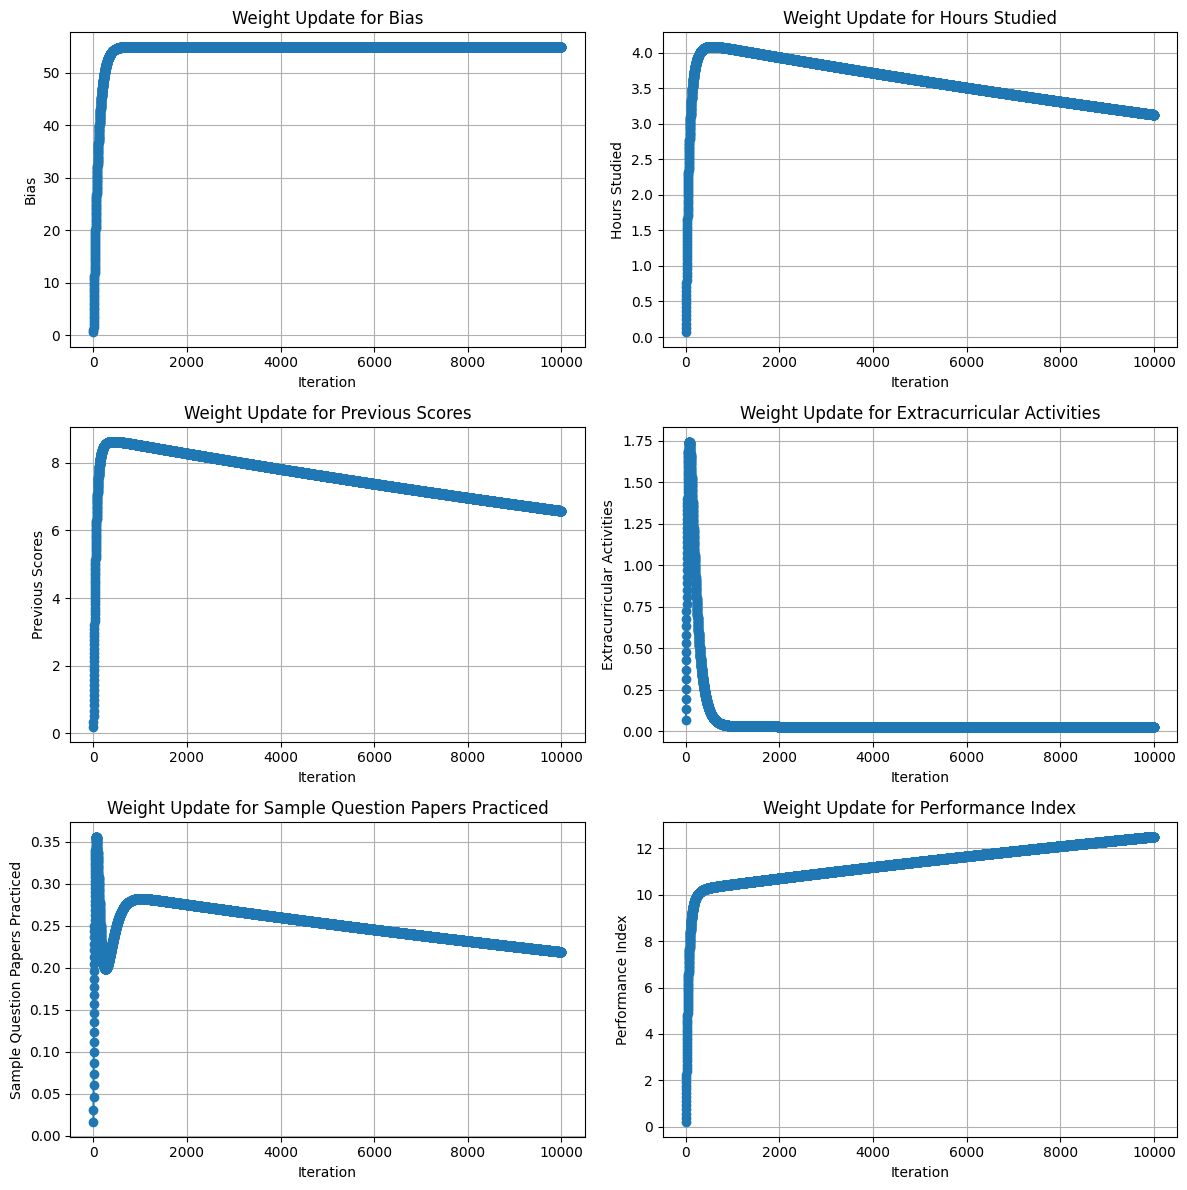

In [16]:
# =============================================================================
# 11. Using all 10,000 iterations ^^
# =============================================================================

final_weights, weight_history = gradient_descent(X_train_aug, y_train, 
                                                 initial_weights,
                                                 learning_rate=0.01, 
                                                 iterations=10000)

# Convert weight_history list to a NumPy array for plotting
weight_history = np.array(weight_history)  # shape: (iterations, number_of_weights)

# Define names for each weight: first weight is the Intercept, then the feature names
weight_names = ['Bias'] + features

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()  # Flatten the grid for easy indexing

# Plot the evolution of each weight over iterations
for j in range(weight_history.shape[1]):
    axs[j].plot(range(1, len(weight_history) + 1), weight_history[:, j],
                marker='o', linestyle='-')
    axs[j].set_xlabel('Iteration')
    axs[j].set_ylabel(weight_names[j])
    axs[j].set_title(f'Weight Update for {weight_names[j]}')
    axs[j].grid(True)

# Hide any unused subplots (if any)
for k in range(weight_history.shape[1], len(axs)):
    axs[k].axis('off')

plt.tight_layout()
plt.show()


In [17]:
# Predict using the final weights for all test observations
predictions = X_test_aug.dot(final_weights)

# Show a few predictions alongside actual values
predictions = X_test_aug.dot(final_weights)
print("Predictions on Test Set:")
predictions

Predictions on Test Set:


array([31.34141936, 35.3634258 , 36.63101421, 75.67624175, 34.52854598,
       56.36490033, 85.54215198, 24.99713064, 29.70976574, 60.82407804,
       75.4550396 , 21.20670121, 66.9488541 , 23.73435269, 75.06665059,
       38.56006709, 16.82783704, 41.59232616, 48.62487649, 61.08979491,
       85.82305418, 35.4959604 , 40.73333415, 61.7561761 , 52.37824021,
       41.306885  , 48.53445959, 38.72767652, 53.34740399, 27.90091168])

In [18]:
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(f"Mean Squared Error on Test Set: {mse:.4f}")
print(f"Root Mean Squared Error on Test Set: {rmse:.4f}")

Mean Squared Error on Test Set: 0.6015
Root Mean Squared Error on Test Set: 0.7756
